In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

# Unsupervised Learning

## Colleges

College.csv dataset contains statistics for a large number of U.S. colleges from the 1995 issue of U.S. News and World Report.

1. Peform PCA analysis on the college dataset and plot the first two principal components. Describe the results.
    * What variables appear strongly correlated on the first principla component?
    * What about the second principal component? 
    
    > Be sure to remove any variables that are not numeric

1. Calculate the cumulative proportion of variance explained by all the principal components. Approximately how much of the variance in College is explained by the first two principal components?


In [38]:
def plot_pca(df, loc, vector=True, observation=False):
    # Basic set up of DataFrame
    num_col = df.shape[1]
    load_list = ['V' + str(x+1) for x in range(num_col)]
    pca_list = ['PC' + str(x+1) for x in range(num_col)]
    dataframe = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

    x = loc[0], loc[1]
    y= loc[2], loc[3]
    
    # get loading vectors
    pca_loadings = pd.DataFrame(PCA().fit(dataframe).components_.T, index=df.columns, columns=load_list)
    pca_plot = pd.DataFrame(PCA().fit_transform(dataframe), columns=pca_list, index=dataframe.index)

    # set up the figure
    fig, ax1 = plt.subplots(figsize=(9,6))
    ax1.set_xlim(*x)
    ax1.set_ylim(*y)
    
    # plot the reference line
    ax1.hlines(0,*x, linestyles='dotted', colors='black')
    ax1.vlines(0,*y, linestyles='dotted', colors='black')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    
    if vector == True:
        # plot the loading position
        a = 1.2
        for i in pca_loadings[['V1','V2']].index:
            ax1.annotate(i, ( pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
        # plot the vector lines
        for i in range(num_col):
            ax1.arrow(0,0, pca_loadings.V1[i], -pca_loadings.V2[i])
            ax1.set_title('First Two Principle Components')
    
    # plot the observation
    if observation == True:
        for i in pca_plot.index:
            ax1.annotate(i, (- pca_plot.PC1.loc[i], pca_plot.PC2.loc[i]), ha='center')
            ax1.set_title('Q2 Observations on the first and second principal components')   
    plt.show() 

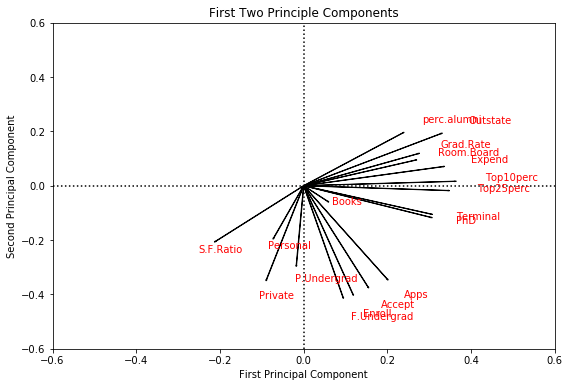

In [39]:
college = pd.read_csv('College.csv')
college['Private'] = pd.get_dummies(college['Private'])
loc = [-0.6,0.6,-0.6,0.6]
plot_pca(college, loc)

Q1 : <br>
The first principal component correlated with 'Top10perc', 'Top25perc', 'Expend', 'OutState', 'Terminal', 'PhD', 'Grad.Rate', 'Room Board', 'perc.alumni'. <br>
The second principal component seems correlated with 'F.Undergrad', 'Enroll', 'Accept', 'Apps', 'Private', 'P.Undergrad', 'Personal', 'S.F.Ratio'.

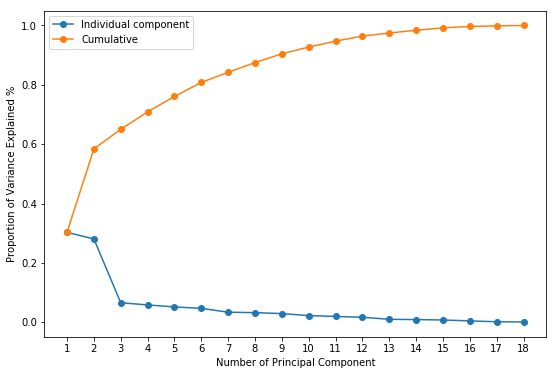

58.4223329588


In [23]:
def plot_variance(dataframe0, loc):
    # Basic set up of DataFrame
    num_col = dataframe0.shape[1]
    load_list = ['V' + str(x+1) for x in range(num_col)]
    pca_list = ['PC' + str(x+1) for x in range(num_col)]
    dataframe = pd.DataFrame(scale(dataframe0))
    x = loc[0], loc[1]
    y= loc[2], loc[3]

    # get loading vectors
    pca = PCA().fit(dataframe)
    
    # Second graph: draw the variance explanation
    fig, ax2 = plt.subplots(figsize=(9,6))
    plt.plot(range(1, num_col+1), pca.explained_variance_ratio_, '-o', label='Individual component')
    plt.plot(range(1, num_col+1), np.cumsum(pca.explained_variance_ratio_), '-o', label='Cumulative')
    plt.ylabel('Proportion of Variance Explained %')
    plt.xlabel('Number of Principal Component')
    plt.xticks(list(range(1,num_col+1)))
    plt.legend()
    plt.show()
    print(pca.explained_variance_ratio_[:2].sum()*100)
plot_variance(college, loc)

Q2 : <br>
From our data we could see that first two components explained 58.4% of the total variance.

# Clustering States

USArrests.csv contains 50 observations from 1973 with variables on crime statistics.

1. Perform PCA on the dataset and plot the observations on the first and second principal components.
1. Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.
1. Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.
1. Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.
1. Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.
1. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
1. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
1. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

# Question 1

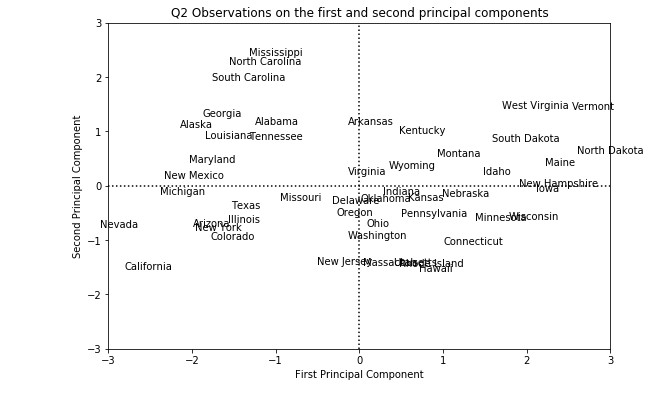

In [6]:
usar = pd.read_csv('USArrests.csv', index_col=0)
loc = [-3, 3, -3, 3]
plot_pca(usar, loc, False, True)

# Question 2-4

In [24]:
def plot_pca_km(df, loc, k, raw=True):
    # Basic set up of DataFrame
    num_col = df.shape[1]
    load_list = ['V' + str(x+1) for x in range(num_col)]
    pca_list = ['PC' + str(x+1) for x in range(num_col)]
    dataframe = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
    x = loc[0], loc[1]
    y= loc[2], loc[3]
    
    # get loading vectors
    pca_loadings = pd.DataFrame(PCA().fit(dataframe).components_.T, index=dataframe.columns, columns=load_list)
    pca_plot = pd.DataFrame(PCA().fit_transform(dataframe), columns=pca_list, index=dataframe.index)

    # set up the figure
    fig, ax = plt.subplots(figsize=(9,6))
    ax.set_xlim(*x)
    ax.set_ylim(*y)
    
    # plot the reference line
    ax.hlines(0,*x, linestyles='dotted', colors='black')
    ax.vlines(0,*y, linestyles='dotted', colors='black')
    ax.set_xlabel('First Principal Component')
    ax.set_ylabel('Second Principal Component')
    
    # plot the observation
    a = 1.1
    for i in pca_plot.index:
        ax.annotate(i, (-pca_plot.PC1.loc[i] * a, pca_plot.PC2.loc[i] * a), ha='center')
    ax.set_title('Observations on the first and second principal components')
    
    if raw == True:
        km = KMeans(n_clusters=k, n_init=15).fit(df)
        center = PCA().fit(dataframe).fit_transform(km.cluster_centers_)
        ax.set_title('K-Means Clustering: K=' + str(k))
    
    else:
        km = KMeans(n_clusters=k, n_init=15).fit(pca_plot)
        center = PCA().fit(dataframe).fit_transform(km.cluster_centers_)
        ax.set_title('K-Means Clustering: K=' + str(k) + ' Principal Components')

    ax.scatter(-pca_plot.PC1, pca_plot.PC2 ,c= km.labels_) 
    ax.scatter(center[:,0], center[:,1], marker='+', s=100, c='k', linewidth=2)
 

    plt.show() 

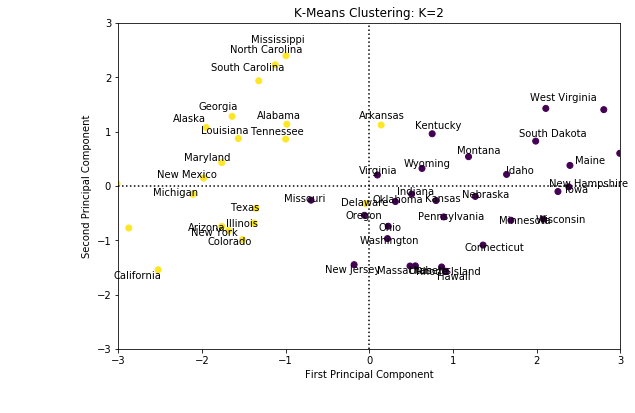

In [25]:
plot_pca_km(usar, loc, 2)

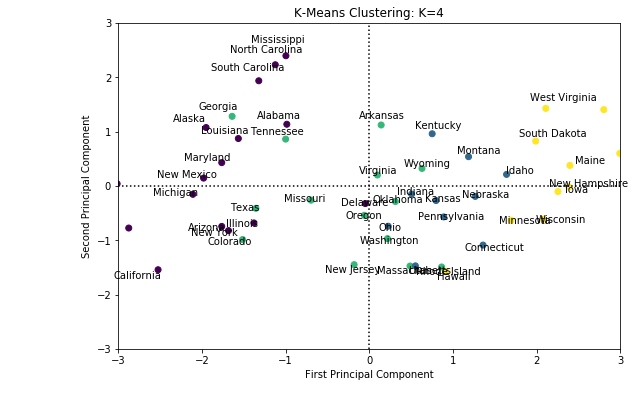

In [26]:
plot_pca_km(usar,loc,4)

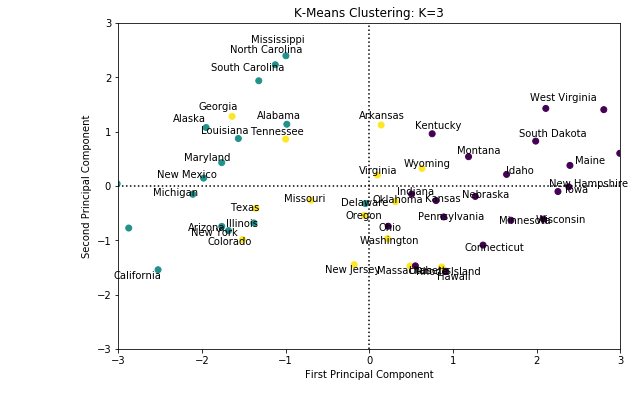

In [27]:
plot_pca_km(usar,loc,3)

# Question 5

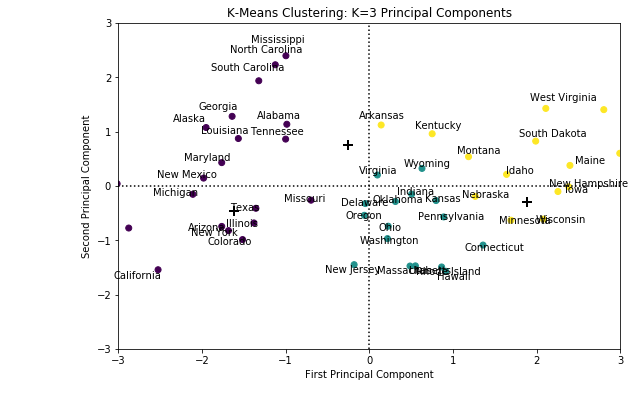

In [22]:
plot_pca_km(usar,loc,3, False)

Q5: The algorithm works on the principal components make the graph makes more sense, because it is just a geographic clustering. The original data one predicts poorly at the border case. But this does not implies that this method is better. Because by implementing principal component analysis, we loss some information.

# Question 6-7

In [15]:
def report_hierarchy(tree, n):
    # visulization 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
    dendrogram1 = hierarchy.dendrogram(tree, p=n, labels=usar.index, ax=ax1)
    ax1.set_title('Complete Tree')
    dendrogram2 = hierarchy.dendrogram(tree, p=n, truncate_mode='lastp', labels=usar.index, ax=ax2)
    ax2.set_title('Cutted Tree')
    plt.show()
    
    # print the cluster information
    cluster = hierarchy.fcluster(tree,n,criterion='maxclust')
    cluster_dic = dict()
    for state_id, group in enumerate(cluster):
        if group in cluster_dic:
            cluster_dic[group].append(usar.index[state_id])
        else:
            cluster_dic[group] = [usar.index[state_id],]
    for i in range(1,n+1):
        print (f'The {i} th cluster of states includes {", ".join(cluster_dic[i])}.')
        print('\n')

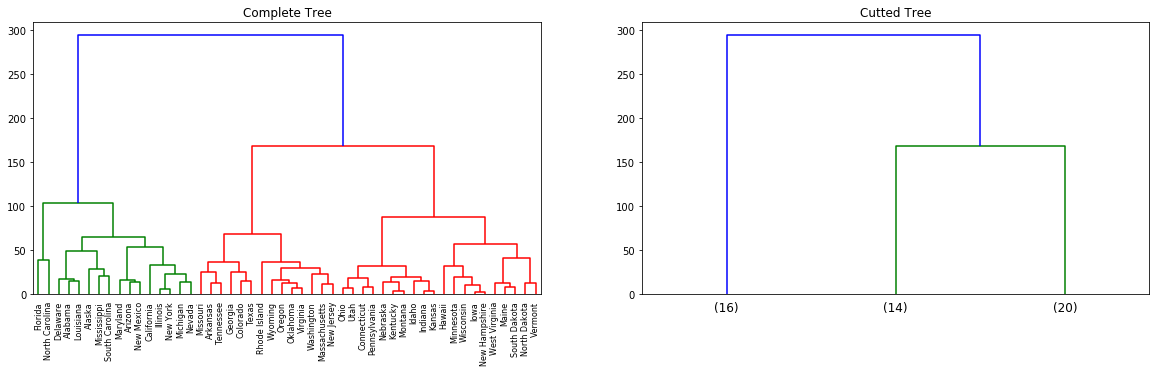

The 1 th cluster of states includes Alabama, Alaska, Arizona, California, Delaware, Florida, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina.


The 2 th cluster of states includes Arkansas, Colorado, Georgia, Massachusetts, Missouri, New Jersey, Oklahoma, Oregon, Rhode Island, Tennessee, Texas, Virginia, Washington, Wyoming.


The 3 th cluster of states includes Connecticut, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, Ohio, Pennsylvania, South Dakota, Utah, Vermont, West Virginia, Wisconsin.




In [16]:
tree = hierarchy.linkage(usar, method='complete')
report_hierarchy(tree, 3)

# Question 8

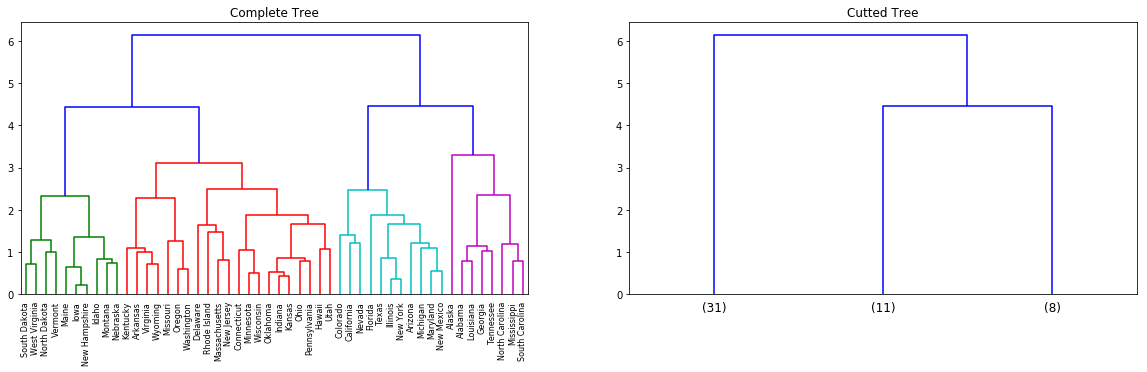

The 1 th cluster of states includes Arkansas, Connecticut, Delaware, Hawaii, Idaho, Indiana, Iowa, Kansas, Kentucky, Maine, Massachusetts, Minnesota, Missouri, Montana, Nebraska, New Hampshire, New Jersey, North Dakota, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, South Dakota, Utah, Vermont, Virginia, Washington, West Virginia, Wisconsin, Wyoming.


The 2 th cluster of states includes Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Nevada, New Mexico, New York, Texas.


The 3 th cluster of states includes Alabama, Alaska, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee.




In [17]:
susar = pd.DataFrame(scale(usar), index=usar.index, columns=usar.columns)
stree = hierarchy.linkage(susar, method='complete')
report_hierarchy(stree, 3)

Q8: First of all, after scaling, the layers of clustering is reduced. Second, before the scaling, if some components of particular statistics is very large, then effects from other components are surpressed. In our case, the assault took a unproportionally high importance. For example, Alaska has a very different values in all apsect, but it has smaller assault rate, other three statistics of Alaska is largely ignored in the non-scaling clustering.